# Basic Image Classifier

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle Boot

In [3]:
names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


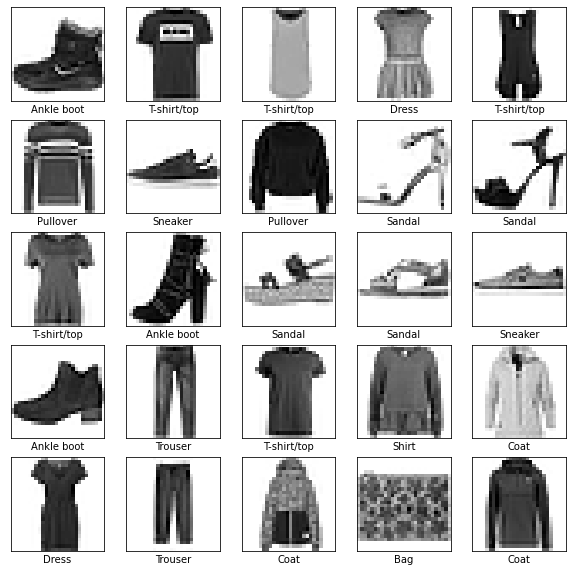

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(names[y_train[i]])
plt.show()


In [ ]:
# Buliding the model

In [5]:
x_train = x_train/255.0
x_test = x_test /255.0

#as the pixel sixe is up to 255

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])



model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(x_train,y_train,epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4972 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3756 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3362 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3122 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2795 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2687 - accuracy: 0.8998
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2565 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2473 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [8]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 1s - loss: 0.3316 - accuracy: 0.8851

Test accuracy: 0.8851000070571899


In [12]:
y_pred = model.predict(x_test)
y_pred[0]


array([ -7.349255  , -16.397789  , -11.830674  , -13.801061  ,
       -13.487507  ,  -4.4705677 ,  -6.223307  ,   0.07056399,
       -13.428201  ,   5.7871804 ], dtype=float32)

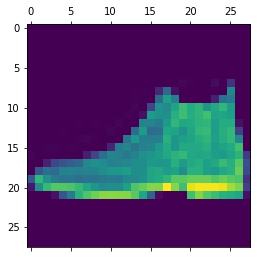

In [13]:
plt.matshow(x_test[0])

In [14]:
np.argmax(y_pred[0])

9

In [16]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:2]

[9, 2]

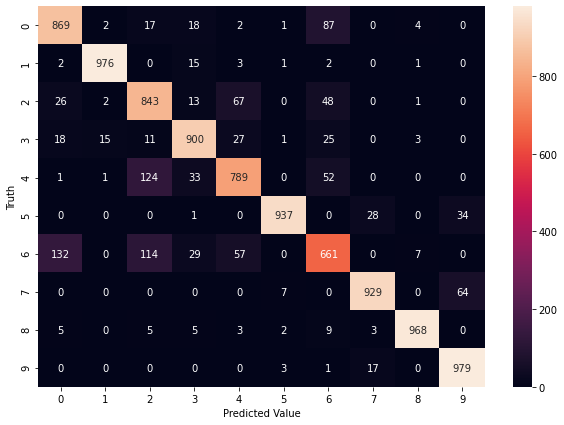

In [17]:
conmatrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(conmatrix,annot=True,fmt="d")
plt.xlabel("Predicted Value")
plt.ylabel("Truth")
plt.show()